# 7.2: Examining `G.fst` with `openFST` 
## (in `python` with `pywrapfst`)

`openFST` has a `python` wrapper called [`pywrapfst`](http://www.openfst.org/twiki/bin/view/FST/PythonExtension) that gives us *most* of the functionality of `openFST` but from inside `python`.

In [2]:
# because of the way `kaldi` installed `openFST` we have to add the path to the python functions here
import sys
sys.path.append("/home/kaldi/tools/openfst-1.6.2/lib/python2.7/site-packages")    

import pywrapfst as fst  # the wrapper module
import graphviz as dot   # a wrapper for graphviz, which will allow us to visualize

ImportError: No module named pywrapfst

In [3]:
v = fst.Fst.read("resource_files/fst/animal_fst-2_gram.fst")
print(v)

NameError: name 'fst' is not defined

## creating `fst`

In [14]:
f = fst.Fst()
s = f.add_state()
f.set_start(s)
n = f.add_state()
f.verify()

True

In [15]:
print(f)

0	Infinity
1	Infinity



## loading `fst`

In [17]:
v = fst.Fst.read("binary.fst")
print(v)

0	1	1	0.5
0	1	2	1.5
1	2	3	2.5
2	3.5



## drawing `fst` in `dot`

In [20]:
v.draw("binary.gv")

In [38]:
%%bash
cat binary.gv

digraph FST {
rankdir = LR;
size = "8.5,11";
label = "";
center = 1;
orientation = Landscape;
ranksep = "0.4";
nodesep = "0.25";
0 [label = "0", shape = circle, style = bold, fontsize = 14]
	0 -> 1 [label = "1:1/0.5", fontsize = 14];
	0 -> 1 [label = "2:2/1.5", fontsize = 14];
1 [label = "1", shape = circle, style = solid, fontsize = 14]
	1 -> 2 [label = "3:3/2.5", fontsize = 14];
2 [label = "2/3.5", shape = doublecircle, style = solid, fontsize = 14]
}


## loading `.dot` from file

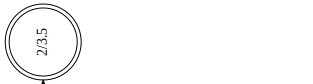

In [10]:
dot.Source.from_file("binary.dot")

In [35]:
%%bash
# orientation = Landscape ruins the image here
cat binary.dot

digraph FST {
rankdir = LR;
size = "8.5,11";
label = "";
center = 1;
orientation = Landscape;
ranksep = "0.4";
nodesep = "0.25";
0 [label = "0", shape = circle, style = bold, fontsize = 14]
	0 -> 1 [label = "a:x/0.5", fontsize = 14];
	0 -> 1 [label = "b:y/1.5", fontsize = 14];
1 [label = "1", shape = circle, style = solid, fontsize = 14]
	1 -> 2 [label = "c:z/2.5", fontsize = 14];
2 [label = "2/3.5", shape = doublecircle, style = solid, fontsize = 14]
}


In [36]:
raw_dot_string = """
digraph FST {
rankdir = LR;
size = "8.5,11";
label = "";
center = 1;
ranksep = "0.4";
nodesep = "0.25";
0 [label = "0", shape = circle, style = bold, fontsize = 14]
        0 -> 1 [label = "1:1/0.5", fontsize = 14];
        0 -> 1 [label = "2:2/1.5", fontsize = 14];
1 [label = "1", shape = circle, style = solid, fontsize = 14]
        1 -> 2 [label = "3:3/2.5", fontsize = 14];
2 [label = "2/3.5", shape = doublecircle, style = solid, fontsize = 14]
}
"""

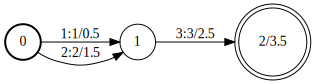

In [37]:
dot_string = dot.Source(raw_dot_string)
dot_string